# IE30301 DataMining Programming HW1

Type your name and student ID here. Do not share this Jupyter Script online.
### NAME: lee min jae (이민재)
### Student Number: 20161190

---

### Import Packages
- Do not use packages specified other than below
- However, it is not nessasary to use all the packages below 
- For task 1.6, you need to use the package 'statsmodel.api'
- Both packages('sklearn.linear_model' and 'statsmodels.api') can be used to load linear regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Task 1. Multiple linear regression [15 points]

#### 1.1 Load Dataset [1 points]

In [2]:
data = pd.read_csv("diabetes.csv")

#### 1.2 Split Dataset into the train & test set [1 points]
- You have to use the specified random seed when dividing the dataset using the function 'train_test_split'
- The specified random seed value is 0
- The ratio of train set and test set is as follows: 70% train set / 30% test set

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(data.iloc[:,:10],data.iloc[:,10:],train_size=0.7, random_state=0)

#### 1.3 Load model and train the model [2 points]
- Intercept term should be included for training

In [4]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

print("intercept :", model.intercept_ )

intercept : [153.71914541]


#### 1.4 Predict and evaluate the model [4 points]

- Predict target y using the trained model
- Evaluate the trained model using the two metrics (*it is not allowed to use packages for this task)
    1. mean squared error(MSE)
    2. R2 score
- Calculated scores should be placed in the specified cell

In [5]:
# predict 
Y_pred = model.predict(X_test)
Y_pred

array([[239.6785766 ],
       [250.53141737],
       [164.84805461],
       [120.27678545],
       [181.73395543],
       [262.21230671],
       [112.23276599],
       [191.94646405],
       [151.50037962],
       [236.97547898],
       [172.17106886],
       [181.76776675],
       [112.11718447],
       [ 93.10535397],
       [242.61551546],
       [ 91.18854011],
       [153.66210217],
       [ 64.67732159],
       [ 99.36843868],
       [212.25939578],
       [197.03895856],
       [162.46443162],
       [164.14281795],
       [157.73824133],
       [207.25537379],
       [170.20342369],
       [111.97456707],
       [ 82.77243482],
       [186.91705702],
       [164.72179002],
       [175.37310208],
       [ 82.34780886],
       [144.28954965],
       [149.22361436],
       [144.09115907],
       [194.25825855],
       [166.52462404],
       [188.10488874],
       [126.97750787],
       [205.91826796],
       [ 85.53348753],
       [167.78356048],
       [147.74549209],
       [183

In [6]:
# calculate MSE 
c = len(Y_test) 
Y_test1 = np.array(Y_test)

MSE = (1/c)*((Y_pred-Y_test1)**2).sum()


In [7]:
# write calculated MSE value here 
print("mean squared error : ", MSE)


mean squared error :  3097.146138387797


In [8]:
# calculate R2
SSE = 0
SST = 0

c = len(Y_test)
Y_test1 = np.array(Y_test)

SSE = ((Y_pred-Y_test1)**2).sum()

mu = Y_test1.mean()
SST = ((Y_test1-mu)**2).sum()

In [9]:
# write calculated R2 score here 
R2 = 1-SSE/SST
print("R2: ", R2)

R2:  0.3928939845074759


#### 1.5 Write the linear regression formula of the trained model [3 points]

In [10]:
A = [round(float(model.intercept_),4)]
print("y_pred = ")
for i in range(1,11):
    A.append("(" + str(round(model.coef_[0][i-1],4)) + ")*X_" + str(i))
for i in range(len(A)-1):
        print(A[i], end ="+")
print(A[len(A)-1])

y_pred = 
153.7191+(-52.4699)*X_1+(-193.5106)*X_2+(579.4828)*X_3+(272.464)*X_4+(-504.724)*X_5+(241.6844)*X_6+(-69.7362)*X_7+(86.6202)*X_8+(721.9558)*X_9+(26.7789)*X_10


#### 1.6 Check the p-value and find out significant variables [4 points]
- Print p-value of each variable 
- List all variables judged to be significant based on the p-value 0.05 

In [11]:
# p-value of each variable
sm.OLS(Y_train,X_train).fit().pvalues

age    0.664453
sex    0.621318
bmi    0.030345
bp     0.189073
s1     0.902778
s2     0.666779
s3     0.919180
s4     0.431045
s5     0.572537
s6     0.929429
dtype: float64

In [12]:
# significant variables list 

p_values = sm.OLS(Y_train,X_train).fit().pvalues

s_var = []
for i in range (len(p_values)):
    if p_values[:][i] < 0.05:
        s_var.append(p_values[i:i+1])
        
print(s_var)

[bmi    0.030345
dtype: float64]


## Task 2. Simple linear regression [15 points]

#### 2.1 Select one feataure using information of p-value [1 points]
- Select one of the variables judged to be significant in task 1.6 and mention the variable name you choose
- Remake a dataset only including the variable you choose 

In [13]:
#p_test -> we use bmi and do simple linear regression.
re_data = data.drop(["age","sex",'bp',"s1","s2","s3","s4","s5","s6"],axis = 1)
re_data

,bmi,target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


#### 2.2 Split Dataset into the train & test set [1 points]
- To perform this task, you need to use the reconstructed dataset in task 2.1
- You have to use the specified random seed when dividing the dataset using the package 'train_test_split'
- The specified random seed value is 0
- The ratio of train set and test set is as follows: 70% train set / 30% test set

In [14]:
X_train,X_test, Y_train, Y_test = train_test_split( re_data.iloc[:,:1],re_data.iloc[:,1:], train_size=0.7, random_state=0)

#### 2.3 Load model and train the model [2 points]
- Intercept term should be included for training

In [15]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

print("Intercept : " , model.intercept_)
print("Coef : ", model.coef_)

Intercept :  [153.43509039]
Coef :  [[1013.17358257]]


#### 2.4 Predict and evaluate the results [4 points]

- Predict target y using the trained model
- Evaluate the trained model using the two metrics (*it is not allowed to use packages for this task)
    1. mean squared error(MSE)
    2. R2 score
- Calculated scores should be placed in the specified cell

In [16]:
# predict 
Y_pred = model.predict(X_test)
Y_pred

array([[259.62448579],
       [214.85204626],
       [162.43553169],
       [129.67521008],
       [199.56389618],
       [251.98041075],
       [124.21515648],
       [176.63167105],
       [208.29998194],
       [200.6559069 ],
       [ 94.73086704],
       [200.6559069 ],
       [115.47907072],
       [106.74298496],
       [243.24432499],
       [130.7672208 ],
       [ 93.63885632],
       [101.28293136],
       [ 68.52260975],
       [194.10384258],
       [182.09172465],
       [164.61955313],
       [128.58319936],
       [212.66802482],
       [209.39199266],
       [171.17161745],
       [111.11102784],
       [107.83499568],
       [158.06748881],
       [179.90770321],
       [150.42341377],
       [100.19092064],
       [142.77933873],
       [141.68732801],
       [147.14738161],
       [174.44764961],
       [137.31928513],
       [143.87134945],
       [154.79145665],
       [187.55177826],
       [ 87.08679199],
       [142.77933873],
       [146.05537089],
       [149

In [17]:
# code for caluating MSE
c = len(Y_test) 
Y_test1 = np.array(Y_test)

MSE = (1/c)*((Y_pred-Y_test1)**2).sum()



In [18]:
# write calculated MSE value here 
print("mean squared error : ", MSE)

mean squared error :  3921.372027424851


In [19]:
# code for calculating R2 score
Ynew_test1 = np.array(Y_test)

SSE = ((Ynew_test1 - Y_pred)**2).sum()

mu = Ynew_test1.mean()
SST = ((mu-Ynew_test1)**2).sum()

In [20]:
# write calculated R2 score value here 
R2 = 1 - SSE/SST

print("R2: ", R2)

R2:  0.23132831307953805


#### 2.5 Write the linear regression formula of the trained model [3 points]

In [21]:
print("y_hat = ""(" +str(round(float(model.intercept_),5)) +") + " +"(" + str(round(float(model.coef_),5)) + ")*" + "X_1")

y_hat = (153.43509) + (1013.17358)*X_1


#### 2.6 Plot graph [4 points]
- Plot data points of test set and draw the line you get from the trained model 

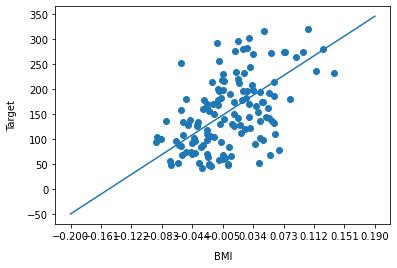

In [22]:
plt.scatter(X_test,Y_test)
x = np.arange(-0.2,0.2,0.01)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y)
plt.xlabel('BMI', labelpad=10)
plt.ylabel("Target", labelpad=10)

plt.xticks(np.linspace(x[0],x[-1],11))

plt.show()